In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVR

path = "/content/drive/MyDrive/dataset/PDOs PY copy.csv"
data = pd.read_csv(path)

y = data.PY
X = data.drop(['PY'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y)

#Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

model = SVR(kernel='linear')
model.fit(OH_X_train, y_train)
pred = model.predict(OH_X_valid)

print("Mean Absolute Error: " + str(mean_absolute_error(y_valid, pred)))
print("MSE: " + str(mean_squared_error(pred, y_valid)))

RMSE = sqrt(mean_squared_error(pred, y_valid))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(y_valid, pred)))


Mean Absolute Error: 4.54699721612444
MSE: 92.81497758290858
RMSE: 9.634053019519282
R2 score: 0.3271554162060488


In [ ]:
#improved version always second (normalized for SVM)

from math import sqrt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVR

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['CR (%)']) #output feature
X = data.drop(['CR (%)', 'ECR PY (%)', 'PDOs PY (%)', 'POHs PY (%)', 'V'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

#start SVM regression modelling
model = SVR(C=10, gamma='scale', kernel='rbf')
model.fit(imp_train_X, train_y)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

pred = model.predict(imp_test_X)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, pred)))
print("MSE: " + str(mean_squared_error(pred, test_y)))

RMSE = sqrt(mean_squared_error(pred, test_y))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, pred)))

Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)
Training score:  0.9647602128357118
Mean Absolute Error: 0.1370976312397405
MSE: 0.03685290499087797
RMSE: 0.19197110457274025
R2 score: 0.9648062508615759


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#next, gridsearch for hyperparameter optimixation

from math import sqrt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVR

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PDOs PY (%)']) #output feature
X = data.drop(['CR (%)', 'PDOs PY (%)', 'I (A)'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

#hyperparamter optimization using gridsearch
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = GridSearchCV(
            estimator=SVR(),
            param_grid={'C': [0.1, 1, 10],
                        'kernel': ['linear', 'rbf', 'poly'],
                        'gamma': ['scale', 'auto']},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
#This includes 3-fold validation (cv=3) and uses mean scare error as the metric for evaluation

random_cv.fit(imp_train_X,train_y)

# use the best parameters
best_params = random_cv.best_params_
best_score = random_cv.best_score_
print('\n Best hyperparameters:', best_params)

# using the best parameters run XGBoost
model = SVR(**best_params)
model.fit(imp_train_X, train_y)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

pred = model.predict(imp_test_X)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, pred)))
print("MSE: " + str(mean_squared_error(pred, test_y)))

RMSE = sqrt(mean_squared_error(pred, test_y))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, pred)))

Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)

 Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training score:  0.7491333259681967
Mean Absolute Error: 0.32241889373296806
MSE: 0.5272046336802155
RMSE: 0.7260885852843408
R2 score: 0.5319213433167946


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1]:
###########improved version always second (normalized for SVM) - PDOs PY

from math import sqrt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVR

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PDOs PY (%)']) #output feature
X = data.drop(['CR (%)', 'ECR PY (%)', 'PDOs PY (%)', 'POHs PY (%)', 'V'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

#start SVM regression modelling
model = SVR(C=10, gamma='scale', kernel='rbf')
model.fit(imp_train_X, train_y)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

pred = model.predict(imp_test_X)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, pred)))
print("MSE: " + str(mean_squared_error(pred, test_y)))

RMSE = sqrt(mean_squared_error(pred, test_y))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, pred)))

Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)
Training score:  0.7486111293783513
Mean Absolute Error: 0.31810491078925895
MSE: 0.5271120298601905
RMSE: 0.7260248135292556
R2 score: 0.5320035616223858


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training X Shape: (242, 31)
Training y Shape: (242, 1)
Testing X Shape: (81, 31)
Testing y Shape: (81, 1)
Training score:  0.6027360762714518
Mean Absolute Error: 2.753904727861921
MSE: 33.37945156827599
RMSE: 5.777495267698277
R2 score: 0.16757409337279072


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


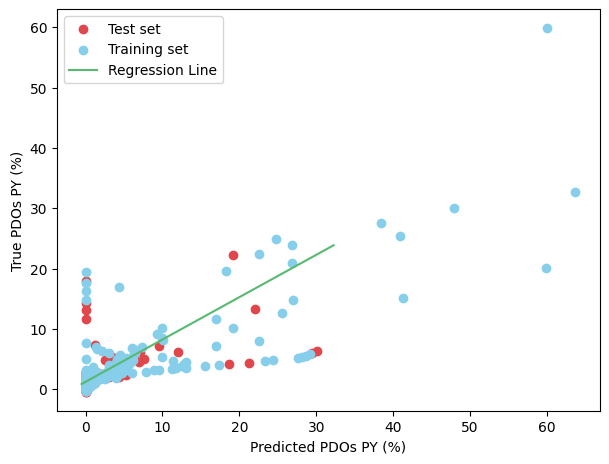

In [ ]:
#lets try to draw them using optimized hyperparameter? no no
#data representation of normalized data is not possible as the data was scaled down!

from math import sqrt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.svm import SVR

path = "/content/drive/MyDrive/dataset/PDOs PY copy.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PY']) #output feature
X = data.drop(['PY'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
yo = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

Xi = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

#start SVM regression modelling
model = SVR(kernel='poly', C=10, gamma='auto')
model.fit(imp_train_X, train_y)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

pred = model.predict(imp_test_X)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, pred)))
print("MSE: " + str(mean_squared_error(pred, test_y)))

RMSE = sqrt(mean_squared_error(pred, test_y))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, pred)))

#draw draw draw!
import matplotlib.pyplot as plt

plt.xlim(-10,80)
plt.ylim(-10,80)

# Plot the predicted values
plt.scatter(test_y, pred, color='#e0474c', label='Test set') #real values call

train_predictions = model.predict(imp_train_X)
plt.scatter(train_y, train_predictions, color='#87ceeb', label='Training set') #real values call

plt.xlabel("Predicted PDOs PY (%)")
plt.ylabel("True PDOs PY (%)")
plt.tight_layout()

#regression line
X = pred
Y = test_y

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
 numer += (X[i] - mean_x) * (Y[i] - mean_y)
 denom += (X[i] - mean_x) ** 2
 m = numer / denom #least square method
 c = mean_y - (m * mean_x)

# Plotting Values and Regression Line
max_x = np.max(X) + 10 #extrapolating
min_x = np.min(X) - 0

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
ax = plt.plot(x, y, color='#58b970', label='Regression Line')

#plt.plot([0, 80], [0, 80], color='black', label='Regression line')
#plt.plot(x_sorted, y_pred_sorted,  color='black', label='Regression line')
plt.axis('tight')
plt.legend()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[-0.50569212  0.          0.10706144  0.11560754  0.55358393 -0.1642734
 -0.12695749  0.10643728 -3.95885089  0.58348297]
Fold 1: R2 Score = -0.505692116613649
Fold 2: R2 Score = 0.0
Fold 3: R2 Score = 0.10706144112272775
Fold 4: R2 Score = 0.11560754054631506
Fold 5: R2 Score = 0.553583929530979
Fold 6: R2 Score = -0.16427340020532744
Fold 7: R2 Score = -0.1269574886774727
Fold 8: R2 Score = 0.10643727640093448
Fold 9: R2 Score = -3.958850886956734
Fold 10: R2 Score = 0.5834829718116603

Mean R2 Score: -0.32896007330405663
Standard Deviation of R2 Scores: 1.2478880243223243


<Axes: >

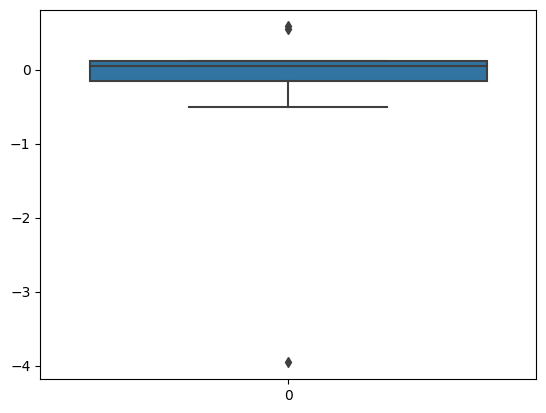

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Perform 5-fold cross-validation and collect R2 scores
# Perform K-Fold CV
r2_scores = cross_val_score(model, Xi, yo, cv=10, scoring='r2')
print (r2_scores)

# Print the R2 scores for each fold
for i, score in enumerate(r2_scores):
    print(f"Fold {i+1}: R2 Score = {score}")

# Calculate the mean and standard deviation of R2 scores
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print the mean and standard deviation of R2 scores
print(f"\nMean R2 Score: {mean_r2}")
print(f"Standard Deviation of R2 Scores: {std_r2}")

#plot boxplot of r2scores
sns.boxplot(data=r2_scores)
